## Timeline for the project
That will also be our next meeting times.
* 4/19-20 try to have dimensionality reduction done.
* 4/26-27 have the best models tuned and selected for the ensemble classification portion to put it together.
* 5/3-4 or earlier we will get together to do the presentation
* 5/13-14 or earlier we will get together to do the final report.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 42

In [73]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

# print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


In [74]:
df = pd.read_csv('./data/student_depression_dataset.csv')
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [75]:
df.count()

,0
id,27901
Gender,27901
Age,27901
City,27901
Profession,27901
Academic Pressure,27901
Work Pressure,27901
CGPA,27901
Study Satisfaction,27901
Job Satisfaction,27901


In [76]:
df.value_counts('Depression')

,count
Depression,
1,16336
0,11565


In [77]:
16336 / 27901 # class balances

0.5854987276441704

In [78]:
11565 / 27901 # class balances

0.41450127235582956

In [79]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


<Axes: xlabel='CGPA'>

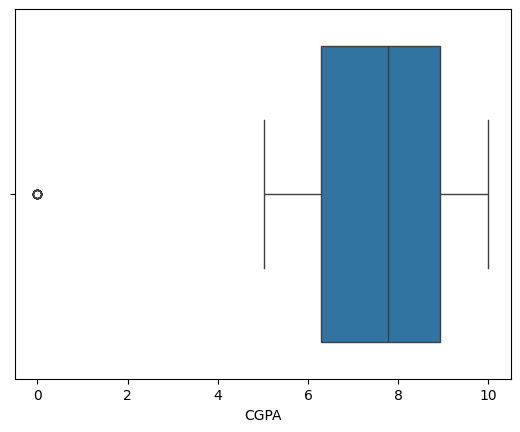

In [80]:
sns.boxplot(x=df['CGPA']) # Looking for outliers

In [81]:
# drop id, city, profession, work pressure, job satisfaction
df = df.drop(['id','City', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1)
df.head(10)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,Male,29.0,2.0,5.70,3.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,Male,30.0,3.0,9.54,4.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,Female,30.0,2.0,8.04,4.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,Male,28.0,3.0,9.79,1.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,Male,31.0,2.0,8.38,3.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [82]:
df = df.rename(columns={"Have you ever had suicidal thoughts ?": "History of suicidal thoughts?"})
df.head(5)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,History of suicidal thoughts?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [83]:
display(df.value_counts(['Sleep Duration']))
display(df.value_counts(['Degree']))

,count
Sleep Duration,
'Less than 5 hours',8310
'7-8 hours',7346
'5-6 hours',6183
'More than 8 hours',6044
Others,18


,count
Degree,
'Class 12',6080
B.Ed,1867
B.Com,1506
B.Arch,1478
BCA,1433
MSc,1190
B.Tech,1152
MCA,1044
M.Tech,1022


In [84]:
def simplify_degree(degree):
    if degree == "MBBS":
        return "Bachelor's"
    elif "PhD" in degree:
        return "Doctorate"
    elif "B" in degree:
        return "Bachelor's"
    elif "M" in degree:
        return "Master's"
    elif "Class" in degree:
        return "HighSchool/GED"
    else:
        return "Other"

# Apply the function to the Degree column
df['Degree'] = df['Degree'].apply(simplify_degree)
df.head(10)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,History of suicidal thoughts?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,Bachelor's,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,Bachelor's,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,Bachelor's,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,Bachelor's,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,Master's,Yes,1.0,1.0,No,0
5,Male,29.0,2.0,5.70,3.0,'Less than 5 hours',Healthy,Doctorate,No,4.0,1.0,No,0
6,Male,30.0,3.0,9.54,4.0,'7-8 hours',Healthy,Bachelor's,No,1.0,2.0,No,0
7,Female,30.0,2.0,8.04,4.0,'Less than 5 hours',Unhealthy,HighSchool/GED,No,0.0,1.0,Yes,0
8,Male,28.0,3.0,9.79,1.0,'7-8 hours',Moderate,Bachelor's,Yes,12.0,3.0,No,1
9,Male,31.0,2.0,8.38,3.0,'Less than 5 hours',Moderate,Bachelor's,Yes,2.0,5.0,No,1


In [85]:
## Found three non-numeric values in Financial Stress and need to make ? value an na
print(df['Financial Stress'].value_counts())

df['Financial Stress'] = np.where(df['Financial Stress'] == '?', np.nan, df['Financial Stress'])

df['Financial Stress'] = df['Financial Stress'].astype(float)

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64


In [86]:
## Summing all of the missing values by column
missing_val_cols = df.isnull().sum()

print(missing_val_cols)

Gender                              0
Age                                 0
Academic Pressure                   0
CGPA                                0
Study Satisfaction                  0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
History of suicidal thoughts?       0
Work/Study Hours                    0
Financial Stress                    3
Family History of Mental Illness    0
Depression                          0
dtype: int64


In [87]:
## need to one hot encode the categorical columns
X = df.drop(['Depression'], axis=1)
y = df['Depression']
# display(X)
# display(y)

X = pd.get_dummies(X, columns=['Gender','Sleep Duration', 'Dietary Habits', 'Degree', 'History of suicidal thoughts?', 'Family History of Mental Illness'], drop_first=True)
display(X)

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_Doctorate,Degree_HighSchool/GED,Degree_Master's,Degree_Other,History of suicidal thoughts?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,8.97,2.0,3.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,24.0,2.0,5.90,5.0,3.0,2.0,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,31.0,3.0,7.03,5.0,9.0,1.0,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,5.59,2.0,4.0,5.0,False,True,False,False,False,True,False,False,False,False,False,False,True,True
4,25.0,4.0,8.13,3.0,1.0,1.0,False,False,False,False,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,7.0,1.0,False,False,False,False,False,False,False,True,False,True,False,False,True,True
27897,27.0,2.0,9.40,3.0,0.0,3.0,True,False,True,False,False,False,False,False,False,False,True,False,False,True
27898,31.0,3.0,6.61,4.0,12.0,2.0,True,False,False,False,False,False,False,True,False,False,True,False,False,False
27899,18.0,5.0,6.88,2.0,10.0,5.0,False,False,True,False,False,False,False,False,False,True,False,False,True,False


In [88]:
## Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

display(X_train.shape)
X_train_percentage = (len(X_train) / len(df)) * 100
print(f'X Training set: {X_train_percentage:.2f}%')

display(X_test.shape)
X_test_percentage = (len(X_test) / len(df)) * 100
print(f'X Test set: {X_test_percentage:.2f}%')

(22320, 20)

X Training set: 80.00%


(5581, 20)

X Test set: 20.00%


In [89]:
## Removing missing values from financial stress column
from sklearn.impute import SimpleImputer

## Filling in missing numeric variables
# Setting imputer as mean
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

# Imputing numeric columns with mean in train data
X_train['Financial Stress'] = imputer.fit_transform(X_train[['Financial Stress']])

# Imputing numeric columns with mean in test data
X_test['Financial Stress'] = imputer.transform(X_test[['Financial Stress']])


## Verifying train and test sets have no missing values
display(X_train.isnull().sum())

display(X_test.isnull().sum())


,0
Age,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Work/Study Hours,0
Financial Stress,0
Gender_Male,0
Sleep Duration_'7-8 hours',0
Sleep Duration_'Less than 5 hours',0
Sleep Duration_'More than 8 hours',0


,0
Age,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Work/Study Hours,0
Financial Stress,0
Gender_Male,0
Sleep Duration_'7-8 hours',0
Sleep Duration_'Less than 5 hours',0
Sleep Duration_'More than 8 hours',0


In [90]:
X_train.dtypes

,0
Age,float64
Academic Pressure,float64
CGPA,float64
Study Satisfaction,float64
Work/Study Hours,float64
Financial Stress,float64
Gender_Male,bool
Sleep Duration_'7-8 hours',bool
Sleep Duration_'Less than 5 hours',bool
Sleep Duration_'More than 8 hours',bool


In [91]:
## Scaling all numerical data

# Importing in scaler
from sklearn.preprocessing import StandardScaler

# Importing in scaler
scaler = StandardScaler()

# Scaling training data
X_train[['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']]= scaler.fit_transform(X_train[['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']])

# Scaling testing data
X_test[['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']] = scaler.transform(X_test[['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']])


In [92]:
## Verifying data has been scaled
display(X_train.head(10))

# display(X_val.head(10))
display(X_test.head(10))

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_Doctorate,Degree_HighSchool/GED,Degree_Master's,Degree_Other,History of suicidal thoughts?_Yes,Family History of Mental Illness_Yes
19702,-1.183371,-0.102586,0.132784,0.775228,0.496608,-0.792576,False,False,False,False,False,True,False,False,False,True,False,False,False,True
8110,0.648339,1.347982,-1.514421,-0.696812,1.304816,-0.097487,True,False,False,False,False,True,False,False,False,False,False,False,True,False
25993,-1.183371,0.622698,1.054677,-1.432832,-0.042197,0.597601,True,False,True,False,False,True,False,False,False,True,False,False,False,False
14323,-0.776325,-1.553154,-0.619643,-0.696812,-1.389209,-0.097487,False,False,False,True,False,False,False,False,False,False,False,False,True,True
19184,1.462432,0.622698,-0.592529,0.039208,-0.311599,-1.487665,False,True,False,False,False,True,False,False,False,False,True,False,True,True
14378,-1.183371,1.347982,0.295471,1.511249,1.304816,-0.792576,False,False,True,False,False,False,False,False,False,True,False,False,True,False
19410,0.241292,-1.553154,-1.297505,0.039208,1.304816,-0.792576,True,False,True,False,False,True,False,False,False,False,False,False,False,True
7019,0.851862,-1.553154,-0.870452,0.039208,-1.928014,-0.792576,True,False,False,False,False,False,False,False,False,False,True,False,False,False
27660,0.241292,-1.553154,1.556295,0.775228,-1.928014,-0.792576,False,False,False,False,False,False,False,False,False,False,True,False,True,False
12926,-1.183371,-0.102586,-0.938238,-0.696812,0.227206,-0.097487,True,False,False,False,False,False,False,True,False,True,False,False,True,False


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_Doctorate,Degree_HighSchool/GED,Degree_Master's,Degree_Other,History of suicidal thoughts?_Yes,Family History of Mental Illness_Yes
9410,-0.165755,-0.827870,-0.416284,0.775228,0.766011,-0.792576,True,False,False,False,False,False,False,True,False,False,True,False,True,True
10598,0.444815,-0.102586,0.627624,0.039208,0.766011,1.292690,False,False,False,True,False,False,False,True,False,False,False,False,True,False
15552,-0.572801,1.347982,1.203806,0.775228,-1.389209,-0.792576,True,False,True,False,False,False,False,True,False,False,False,False,True,False
6854,-0.979848,0.622698,-0.870452,-1.432832,-1.928014,-0.792576,True,True,False,False,False,False,False,True,False,False,False,False,True,True
21769,1.258909,0.622698,0.153120,-0.696812,-0.311599,0.597601,True,False,True,False,False,False,False,False,False,False,True,False,True,False
14964,0.851862,1.347982,0.627624,1.511249,-1.119807,1.292690,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2147,-0.369278,-1.553154,-1.412742,-1.432832,-0.311599,0.597601,False,False,False,True,False,False,False,True,False,False,False,False,False,True
18666,-0.776325,-1.553154,0.627624,0.039208,1.035413,-0.792576,False,False,False,True,False,False,False,True,False,False,False,False,True,True
8022,1.258909,0.622698,-0.206147,-0.696812,-1.658612,-1.487665,False,True,False,False,False,True,False,False,False,False,False,False,False,False
22042,-0.369278,0.622698,1.190249,-1.432832,-0.850404,1.292690,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [93]:
#Use ADASYN and Undersampling
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state = RANDOM_STATE)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
print(y_resampled_adasyn)
print(X_resampled_adasyn)

0        0
1        1
2        1
3        0
4        1
        ..
26177    0
26178    0
26179    0
26180    0
26181    0
Name: Depression, Length: 26182, dtype: int64
            Age  Academic Pressure      CGPA  Study Satisfaction  \
0     -1.183371          -0.102586  0.132784            0.775228   
1      0.648339           1.347982 -1.514421           -0.696812   
2     -1.183371           0.622698  1.054677           -1.432832   
3     -0.776325          -1.553154 -0.619643           -0.696812   
4      1.462432           0.622698 -0.592529            0.039208   
...         ...                ...       ...                 ...   
26177 -0.500219           0.156072  0.124172           -0.696812   
26178 -0.626228          -1.553154 -0.055744           -1.432832   
26179  1.441124          -0.102586 -0.907012            1.511249   
26180 -1.339885           0.455172  1.432584            0.209214   
26181 -0.858903          -1.409486 -0.101717           -1.432832   

       Work/Stud

In [94]:
from imblearn.under_sampling import RandomUnderSampler
random_under_sampler = RandomUnderSampler(random_state = RANDOM_STATE)
X_resampled_rus, y_resampled_rus = random_under_sampler.fit_resample(X_train, y_train)
print(y_resampled_rus)
print(X_resampled_rus)

19702    0
14323    0
7019     0
27660    0
12926    0
        ..
11854    1
15120    1
22621    1
27191    1
3726     1
Name: Depression, Length: 18504, dtype: int64
            Age  Academic Pressure      CGPA  Study Satisfaction  \
19702 -1.183371          -0.102586  0.132784            0.775228   
14323 -0.776325          -1.553154 -0.619643           -0.696812   
7019   0.851862          -1.553154 -0.870452            0.039208   
27660  0.241292          -1.553154  1.556295            0.775228   
12926 -1.183371          -0.102586 -0.938238           -0.696812   
...         ...                ...       ...                 ...   
11854 -1.183371           1.347982 -1.053475            0.775228   
15120 -0.979848          -0.827870  1.197028           -1.432832   
22621 -0.165755          -0.102586  0.281914            0.039208   
27191  1.462432           0.622698 -1.514421            0.039208   
3726  -0.979848          -0.827870  0.173456           -1.432832   

       Work/Stud

## Models we can use: RandomForestClassifier, SVM, LogisticRegression, NaiveBayes, KNN, Decision Tree
* We each choose 2 models from the list above.
* Perform feature reduction: PCA, LDA, Kernel PCA
* Tune hyperparameters: Using the best version of the model we have
* After finding the best model from tuning, then perform K-cross validation
* Select the best model from each of our selected 2, then we can put it together in a voting classifier for the ensemble portion.
## Notes
* Use charts and metrics where appropriate such as f1_score, precision, and accuracy.
* Don't use the validation sets for the feature/dimensionality reduction.


---

# David Braun
* KNN
* SVM

In [95]:
# ---------- extra imports for modelling ----------
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline        import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import f1_score, classification_report, confusion_matrix, RocCurveDisplay
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd, joblib, pathlib

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [96]:
def quick_score(model, Xb, yb, tag):
    model.fit(Xb, yb)
    print(f"{tag}: F1 = {f1_score(y_val, model.predict(X_val)):.3f}")

for Xb, yb, tag in [ (X_resampled_adasyn, y_resampled_adasyn, "KNN ADA"),
                     (X_resampled_rus,    y_resampled_rus,    "KNN RUS") ]:
    quick_score(KNeighborsClassifier(n_neighbors=5, weights='distance'), Xb, yb, tag)

for Xb, yb, tag in [ (X_resampled_adasyn, y_resampled_adasyn, "SVM ADA"),
                     (X_resampled_rus,    y_resampled_rus,    "SVM RUS") ]:
    quick_score(SVC(kernel='linear', C=1, random_state=42), Xb, yb, tag)

NameError: name 'y_val' is not defined

In [ ]:
knn_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('dr',    'passthrough'),          # placeholder
    ('clf',   KNeighborsClassifier())
])

svm_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('dr',    'passthrough'),
    ('clf',   SVC(probability=True, random_state=42))
])

In [ ]:
# ───────────────── 0.  nuke any zombie cluster ──────────────────────────
try:
    client.close(); cluster.close()
except NameError:
    pass                   # first run – nothing to clean up

# ───────────────── 1.  dask‑timeout & CPU threads ───────────────────────
import os, dask
dask.config.set({
    "distributed.comm.timeouts.connect": "120s",   # ← was 30 s
    "distributed.comm.timeouts.tcp":    "120s",
})
os.environ["OMP_NUM_THREADS"] = os.environ["MKL_NUM_THREADS"] = "18"

# ───────────────── 2.  start a TCP‑only 2‑GPU cluster ───────────────────
from dask_cuda import LocalCUDACluster
from dask.distributed import Client

cluster = LocalCUDACluster(
    protocol       ="tcp",        # skip UCX (fewer moving parts)
    interface      ="lo",         # loop‑back only
    enable_nvlink  =False,
    CUDA_VISIBLE_DEVICES="0,1",
    threads_per_worker = 6,       # 12 CPU threads total
    memory_limit       ="24GB",   # host RAM / worker
    rmm_pool_size      ="4GB"     # pre‑alloc on each GPU
)
client  = Client(cluster)
client.wait_for_workers(2)        # block until both GPUs are ready
print("Dask dashboard:", client.dashboard_link)

# ───────────────── 3.  cuML‑UMAP wrapper (same as before) ───────────────
import cupy as cp
from cuml.manifold import UMAP as GPUUMAP
from sklearn.base  import BaseEstimator, TransformerMixin
class CumlUMAP(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=10, n_neighbors=30, random_state=42):
        self.n_components, self.n_neighbors, self.random_state = (
            n_components, n_neighbors, random_state)
    def get_params(self, deep=True): return vars(self).copy()
    def set_params(self, **p):
        for k,v in p.items(): setattr(self,k,v); return self
    def fit(self, X, y=None):
        self._umap = GPUUMAP(**self.get_params()).fit(cp.asarray(X))
        return self
    def transform(self, X):
        return self._umap.transform(cp.asarray(X)).get()

# ───────────────── 4.  pipelines + param grids  ─────────────────────────
from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler
from sklearn.decomposition   import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.pipeline        import Pipeline
from dask_ml.model_selection import GridSearchCV    # ← dask‑ml version

base_pre = [('impute', SimpleImputer(strategy='median')),
            ('scale',  StandardScaler())]

knn_pipe = Pipeline(base_pre + [('dr','passthrough'),
                                ('clf',KNeighborsClassifier())])

svm_pipe = Pipeline(base_pre + [('dr','passthrough'),
                                ('clf',SVC())])

knn_param = {
    'dr': [None,
           PCA(n_components=10, random_state=42),
           LDA(n_components=1),
           CumlUMAP(n_components=10, n_neighbors=30, random_state=42)],
    'clf__n_neighbors':[3,5,7,11],
    'clf__weights':    ['uniform','distance'],
    'clf__metric':     ['euclidean','manhattan']
}
svm_param = {
    'dr': [None,
           PCA(n_components=15, random_state=42),
           CumlUMAP(n_components=15, n_neighbors=30, random_state=42)],
    'clf__kernel':['linear','rbf'],
    'clf__C':     [0.1,1,10],
    'clf__gamma': ['scale','auto']
}

knn_gs = GridSearchCV(knn_pipe, knn_param, scoring='f1', cv=10,
                      n_jobs=-1, error_score='raise')
svm_gs = GridSearchCV(svm_pipe, svm_param, scoring='f1', cv=10,
                      n_jobs=-1, error_score='raise')

# ───────────────── 5.  run the grid searches  ───────────────────────────
print("▶ fitting k‑NN grid …"); knn_gs.fit(Xb, yb)
print("▶ fitting SVM grid …");  svm_gs.fit(Xb, yb)

print("✓ finished")
print("best k‑NN:", knn_gs.best_params_, "  F1 =", knn_gs.best_score_)
print("best SVM:", svm_gs.best_params_, "  F1 =", svm_gs.best_score_)

In [ ]:
best_knn = knn_gs.best_estimator_
best_svm = svm_gs.best_estimator_

print("KNN best params:", knn_gs.best_params_)
print("SVM best params:", svm_gs.best_params_)

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import (classification_report, confusion_matrix,
                             RocCurveDisplay)

def eval_model(mdl, label):
    # CUPY → NUMPY if necessary
    y_pred = mdl.predict(X_val)
    if hasattr(y_pred, "get"):                      # cupy.ndarray
        y_pred = y_pred.get()

    print(f"\n{label}\n", classification_report(y_val, y_pred, digits=3))

    sns.heatmap(confusion_matrix(y_val, y_pred),
                annot=True, fmt='d', cmap='Blues')
    plt.title(f'{label} – Confusion'); plt.show()

    RocCurveDisplay.from_estimator(mdl, X_val, y_val)
    plt.title(f'{label} – ROC'); plt.show()

eval_model(best_knn, "Best KNN")
eval_model(best_svm, "Best SVM")

In [ ]:
from sklearn.model_selection import cross_val_score

full_X = pd.concat([X_train, X_val])
full_y = pd.concat([y_train, y_val])

for mdl, name in [(best_knn, 'KNN'), (best_svm, 'SVM')]:
    scores = cross_val_score(mdl, full_X, full_y,
                             cv=cv, scoring='f1')      # n_jobs = 1
    print(f"{name} 10‑fold F1: {scores.mean():.3f} ± {scores.std():.3f}")

In [ ]:
from sklearn.metrics import f1_score

for mdl, name in [(best_knn, 'KNN'), (best_svm, 'SVM')]:
    y_hat = mdl.predict(X_test)
    if hasattr(y_hat, "get"):
        y_hat = y_hat.get()
    print(name, "TEST F1 =", f1_score(y_test, y_hat))

In [ ]:
import pathlib, joblib
pathlib.Path("models").mkdir(exist_ok=True)

# detach cupy arrays so joblib can pickle (safe‑guard)
for pipe in (best_knn, best_svm):
    if hasattr(pipe, "steps"):
        for name, step in pipe.steps:
            if hasattr(step, "release_cache"):    # many cuML objects
                step.release_cache()

joblib.dump(best_knn, "models/best_knn.pkl")
joblib.dump(best_svm, "models/best_svm.pkl")

In [ ]:
(pd.DataFrame(knn_gs.cv_results_)
   .groupby('param_clf__n_neighbors')['mean_test_score']
   .mean()
   .plot(marker='o'))
plt.ylabel('Mean CV F1'); plt.xlabel('k'); plt.title('KNN: k vs F1'); plt.show()

---

# Karryn Leake
* Logistic Regression
* NaiveBayes

In [97]:
## Importing in needed packages for dimensionality reduction
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [98]:
### Creating base log model code

def train_log_model(X_train_values, y_train_values, X_test_values, y_test_values):
    # Setting up logistic regression model
    log_model = LogisticRegression(random_state = RANDOM_STATE)

    # Training model
    log_model.fit(X_train_values, y_train_values)

    ## Displaying model accuracy

    log_y_hat = log_model.predict(X_test_values)

    # Getting classification report
    report = classification_report(y_test_values, log_y_hat)

    # Getting accuracy specifically
    accuracy = accuracy_score(y_test_values, log_y_hat)

    print(f"Our current model accuracy is {accuracy:.2f}.")
    print("\n")
    print("A more detailed report of the model's overall accuracy is:")
    print(report)

In [99]:
### Creating base naive bayes code

def train_nb_model(X_train_values, y_train_values, X_test_values, y_test_values):
    nb_model = GaussianNB()
    nb_model.fit(X_train_values, y_train_values)

    # Predicting y_hat
    nb_y_hat = nb_model.predict(X_test_values)

    # Getting classification report
    report = classification_report(y_test_values, nb_y_hat)

    # Getting accuracy specifically
    accuracy = accuracy_score(y_test_values, nb_y_hat)

    print(f"Our current model accuracy is {accuracy:.2f}.")
    print("\n")
    print("A more detailed report of the model's overall accuracy is:")
    print(report)

### Initial log model on oversampled and undersampled data

In [100]:
## Training log model using oversampled data
train_log_model(X_resampled_adasyn, y_resampled_adasyn, X_test, y_test)

Our current model accuracy is 0.84.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2313
           1       0.90      0.82      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.84      0.84      5581



In [101]:
## Training log model on undersampled data
train_log_model(X_resampled_rus, y_resampled_rus, X_test, y_test)

Our current model accuracy is 0.85.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2313
           1       0.88      0.85      0.87      3268

    accuracy                           0.85      5581
   macro avg       0.84      0.85      0.84      5581
weighted avg       0.85      0.85      0.85      5581



### Initial nb model on oversampled and undersampled data

In [102]:
## Training nb model on oversampled data
train_nb_model(X_resampled_adasyn, y_resampled_adasyn, X_test, y_test)

Our current model accuracy is 0.84.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.84      0.83      5581



In [104]:
## Training nb model on undersampled data
train_nb_model(X_resampled_rus, y_resampled_rus, X_test, y_test)

Our current model accuracy is 0.84.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2313
           1       0.86      0.86      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



## Experimenting with LDA

### Completing LDA on oversampled data

In [105]:
## Completing LDA on over sampled data

# Getting LDA with n_components = 1 as n_components = number of classes - 1
lda = LinearDiscriminantAnalysis(n_components = 1)

# Performing LDA on train and test data
X_train_lda = lda.fit_transform(X_resampled_adasyn, y_resampled_adasyn)
X_test_lda = lda.transform(X_test)


### Training log and naive bayes models on oversampled data with LDA

In [106]:
train_log_model(X_train_lda, y_resampled_adasyn, X_test_lda, y_test)

Our current model accuracy is 0.84.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2313
           1       0.90      0.82      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.85      0.84      5581
weighted avg       0.85      0.84      0.84      5581



In [107]:
train_nb_model(X_train_lda, y_resampled_adasyn, X_test_lda, y_test)

Our current model accuracy is 0.84.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2313
           1       0.89      0.83      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.84      0.84      5581



## Experimenting with PCA

### Setting up PCA on oversampled data


In [108]:
## Choosing 1 as number of components and testing variance
pca = PCA(n_components = 1)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.15841603]
0.15841603487660863


In [109]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

Our current model accuracy is 0.78.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2313
           1       0.85      0.76      0.80      3268

    accuracy                           0.78      5581
   macro avg       0.78      0.78      0.78      5581
weighted avg       0.79      0.78      0.78      5581



In [110]:
## Testing on naive bayes model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

Our current model accuracy is 0.78.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2313
           1       0.85      0.76      0.80      3268

    accuracy                           0.78      5581
   macro avg       0.78      0.78      0.78      5581
weighted avg       0.79      0.78      0.78      5581



In [111]:
## Choosing 2 as number of components and testing variance
pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)


print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.15841603 0.13181662]
0.2902326511592888


In [112]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

Our current model accuracy is 0.78.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      2313
           1       0.85      0.77      0.80      3268

    accuracy                           0.78      5581
   macro avg       0.78      0.79      0.78      5581
weighted avg       0.79      0.78      0.78      5581



In [113]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

Our current model accuracy is 0.78.


A more detailed report of the model's overall accuracy is:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      2313
           1       0.85      0.77      0.81      3268

    accuracy                           0.78      5581
   macro avg       0.78      0.79      0.78      5581
weighted avg       0.79      0.78      0.79      5581



In [114]:
## Choosing 3 as number of components and testing variance
pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.15841603 0.13181662 0.12353791]
0.4137705655727443


In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Choosing 4 as number of components and testing variance
pca = PCA(n_components = 4)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Choosing 5 as number of components and testing variance
pca = PCA(n_components = 5)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 6 as a random number of components

pca = PCA(n_components = 6)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 7 as a random number of components

pca = PCA(n_components = 7)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 8 as a random number of components

pca = PCA(n_components = 8)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 9 as a random number of components

pca = PCA(n_components = 9)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 10 as a random number of components

pca = PCA(n_components = 10)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 11 as a random number of components

pca = PCA(n_components = 11)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 12 as a random number of components

pca = PCA(n_components = 12)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
# Choosing 13 as a random number of components

pca = PCA(n_components = 13)

X_train_pca = pca.fit_transform(X_resampled_adasyn)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
## Testing on log model
train_log_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_pca, y_resampled_adasyn, X_test_pca, y_test)

## Experimenting with Kernel PCA

### Testing Kernel PCA on oversampled data

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 1, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 3, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 4, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 5, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 6, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 7, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 8, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 9, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Setting up Kernel PCA on train and test data

# Getting kernel PCA started
kernel_pca = KernelPCA(n_components = 10, kernel = 'rbf')

# Performing kernel PCA on train and test data
X_train_kernel = kernel_pca.fit_transform(X_resampled_adasyn)
X_test_kernel = kernel_pca.transform(X_test)

In [ ]:
## Testing on log model
train_log_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

In [ ]:
## Testing on nb model
train_nb_model(X_train_kernel, y_resampled_adasyn, X_test_kernel, y_test)

---

# Cristian Zendejas
* RandomForestClassifier
* Decision Tree

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

### Performing PCA here with the 2 different resampled datasets. Both will also be used to train separate models for RandomForestClassifier & Decision Tree. The experiement for this section will be to see which form of analysis PCA, LDA, or Kernel PCA will produce the best model.

In [ ]:
# look into a chart to display the current data we have?

In [ ]:
# keep an eye on the accuracy for the base models and after the dimensionality reduction, Karryn said her accuracy did not change much

In [ ]:
# did we decide to drop random under sampler since it didn't provide much value when using it in the models?

## Establishing some base models to compare later models too.

In [ ]:
rfc_base_model = RandomForestClassifier(criterion='entropy')
rfc_base_model.fit(X_resampled_adasyn, y_resampled_adasyn)

rfc_base_y_hat = rfc_base_model.predict(X_test)
print(rfc_base_y_hat)

rfc_base_precision = precision_score(y_test, rfc_base_y_hat, average='macro', zero_division=0.0)
rfc_base_recall = recall_score(y_test, rfc_base_y_hat, average='macro', zero_division=0.0)
rfc_base_f1 = f1_score(y_test, rfc_base_y_hat, average='macro', zero_division=0.0)
rfc_base_accuracy = rfc_base_model.score(X_test, y_test)

print(f"RFC Precision: {rfc_base_precision:.2f}")
print(f"RFC Recall: {rfc_base_recall:.2f}")
print(f"RFC F1 Score: {rfc_base_f1:.2f}")
print(f"RFC Accuracy: {rfc_base_accuracy: .2f}")

In [ ]:
dtc_base_model = DecisionTreeClassifier(criterion='entropy')
dtc_base_model.fit(X_resampled_adasyn, y_resampled_adasyn)

dtc_base_y_hat = dtc_base_model.predict(X_test)

dtc_base_precision = precision_score(y_test, dtc_base_y_hat, average='macro', zero_division=0.0)
dtc_base_recall = recall_score(y_test, dtc_base_y_hat, average='macro', zero_division=0.0)
dtc_base_f1 = f1_score(y_test, dtc_base_y_hat, average='macro', zero_division=0.0)
dtc_base_accuracy = dtc_base_model.score(X_test, y_test)

print(f"DTC Precision: {dtc_base_precision:.2f}")
print(f"DTC Recall: {dtc_base_recall:.2f}")
print(f"DTC F1 Score: {dtc_base_f1:.2f}")
print(f"DTC Accuracy: {dtc_base_accuracy: .2f}")

### I'm expecting the RandomForestClassifier to do better than DecisionTreeClassifier since it is just an improved version of it.

## Dimensionality Reduction

In [ ]:
def find_best_explained_variance(model_class, X_train, y_train):
    print(model_class)
    best_explained_variance = -np.inf # using negative infinity to ensure the variable is updated.
    best_n_components = None
    n_range = np.arange(1,15)

    for n in n_range:
        if model_class == PCA:
            model = PCA(n_components=n)
        elif model_class == LinearDiscriminantAnalysis: # do I event want to find the best components for this?
            n_classes = len(np.unique(y_train))
            max_components = min(X_train.shape[1], n_classes - 1)
            if n > max_components:
                continue
            model = LinearDiscriminantAnalysis(n_components=n)
        elif model_class == KernelPCA:
            model = KernelPCA(n_components=n, kernel='rbf')
        else:
            raise ValueError("Unsupported model class")

        if model_class == PCA or model_class == KernelPCA:
            X_train_transformed = model.fit_transform(X_train)
        else:
            X_train_transformed = model.fit_transform(X_train, y_train)

        if model_class == PCA or model_class == LinearDiscriminantAnalysis:
            explained_variance = np.sum(model.explained_variance_ratio_)
            # print(explained_variance)
        elif model_class == KernelPCA:
            explained_variance = np.sum(np.var(X_train_transformed, axis=0)) / np.sum(np.var(X_train, axis=0))

        if explained_variance > best_explained_variance:
            best_explained_variance = explained_variance
            best_n_components = n

    return best_explained_variance, best_n_components

In [ ]:
best_explained_variance, best_n_components = find_best_explained_variance(PCA, X_resampled_adasyn, y_resampled_adasyn)
print(f"Best explained variance: {best_explained_variance}")
print(f"Optimal number of components: {best_n_components}")

In [ ]:
pca_1 = PCA(n_components=best_n_components)
X_train_pca_adasyn = pca_1.fit_transform(X_resampled_adasyn)
print(X_train_pca_adasyn.shape)
# did not actually use adasyn for test set, just using the naming to keep track which variables belong with their respective algorithms
X_test_pca_adasyn = pca_1.transform(X_test)
print(X_test_pca_adasyn.shape)

In [ ]:
pca_1.explained_variance_

In [ ]:
pca_1.explained_variance_ratio_

In [ ]:
np.sum(pca_1.explained_variance_ratio_)

In [ ]:
print(X_train_pca_adasyn)

### 14 components seems to get me the closest to .95 or greater variance.

In [ ]:
best_explained_variance, best_n_components = find_best_explained_variance(PCA, X_resampled_rus, y_resampled_rus)
print(f"Best explained variance: {best_explained_variance}")
print(f"Optimal number of components: {best_n_components}")

In [ ]:
pca_2 = PCA(n_components=best_n_components)
X_train_pca_rus = pca_2.fit_transform(X_resampled_rus)
print(X_train_pca_rus.shape)
# did not actually use rus for test set, just using the naming to keep track which variables belong with their respective algorithms
X_test_pca_rus = pca_2.transform(X_test)
print(X_test_pca_rus.shape)

In [ ]:
pca_2.explained_variance_

In [ ]:
pca_2.explained_variance_ratio_

In [ ]:
np.sum(pca_2.explained_variance_ratio_)

In [ ]:
print(X_train_pca_rus)

### RandomForestClassifier models with one using the ADASYN training data and the other using the RandomUnderSampler data

In [ ]:
rfc_pca_1_model = RandomForestClassifier(criterion='entropy')# need to verify this is the right criterion
rfc_pca_1_model.fit(X_train_pca_adasyn, y_resampled_adasyn)

In [ ]:
rfc_pca_1_y_hat = rfc_pca_1_model.predict(X_test_pca_adasyn)
print(rfc_pca_1_y_hat)

In [ ]:
rfc_pca_1_precision = precision_score(y_test, rfc_pca_1_y_hat, average='macro', zero_division=0.0)
rfc_pca_1_recall = recall_score(y_test, rfc_pca_1_y_hat, average='macro', zero_division=0.0)
rfc_pca_1_f1 = f1_score(y_test, rfc_pca_1_y_hat, average='macro', zero_division=0.0)
rfc_pca_1_accuracy = rfc_pca_1_model.score(X_test_pca_adasyn, y_test)

print(f"RFC Precision: {rfc_pca_1_precision:.2f}")
print(f"RFC Recall: {rfc_pca_1_recall:.2f}")
print(f"RFC F1 Score: {rfc_pca_1_f1:.2f}")
print(f"RFC Accuracy: {rfc_pca_1_accuracy: .2f}")

In [ ]:
rfc_pca_2_model = RandomForestClassifier(criterion='entropy')# need to verify this is the right criterion
rfc_pca_2_model.fit(X_train_pca_rus, y_resampled_rus)

In [ ]:
rfc_pca_2_y_hat = rfc_pca_2_model.predict(X_test_pca_rus)

In [ ]:
rfc_pca_2_precision = precision_score(y_test, rfc_pca_2_y_hat, average='macro', zero_division=0.0)
rfc_pca_2_recall = recall_score(y_test, rfc_pca_2_y_hat, average='macro', zero_division=0.0)
rfc_pca_2_f1 = f1_score(y_test, rfc_pca_2_y_hat, average='macro', zero_division=0.0)
rfc_pca_2_accuracy = rfc_pca_2_model.score(X_test_pca_rus, y_test)

print(f"RFC Precision: {rfc_pca_2_precision:.2f}")
print(f"RFC Recall: {rfc_pca_2_recall:.2f}")
print(f"RFC F1 Score: {rfc_pca_2_f1:.2f}")
print(f"RFC Accuracy: {rfc_pca_2_accuracy: .2f}")

### When looking at the metrics there isn't much of a difference between using RandomUnderSampling and ADASYN. I may decide not use RandomUnderSampling for future models.

### Let's check with the decision tree models to see if there is any improvements. I'll use ADASYN and the RandomUnderSampling data sets again.

In [ ]:
dtc_pca_1_model = DecisionTreeClassifier(criterion='entropy')
dtc_pca_1_model.fit(X_train_pca_adasyn, y_resampled_adasyn)

In [ ]:
dtc_pca_1_y_hat = dtc_pca_1_model.predict(X_test_pca_adasyn)

In [ ]:
dtc_pca_1_precision = precision_score(y_test, dtc_pca_1_y_hat, average='macro', zero_division=0.0)
dtc_pca_1_recall = recall_score(y_test, dtc_pca_1_y_hat, average='macro', zero_division=0.0)
dtc_pca_1_f1 = f1_score(y_test, dtc_pca_1_y_hat, average='macro', zero_division=0.0)
dtc_pca_1_accuracy = dtc_pca_1_model.score(X_test_pca_adasyn, y_test)

print(f"DTC Precision: {dtc_pca_1_precision:.2f}")
print(f"DTC Recall: {dtc_pca_1_recall:.2f}")
print(f"DTC F1 Score: {dtc_pca_1_f1:.2f}")
print(f"DTC Accuracy: {dtc_pca_1_accuracy: .2f}")

In [ ]:
dtc_pca_2_model = DecisionTreeClassifier(criterion='entropy')
dtc_pca_2_model.fit(X_train_pca_rus, y_resampled_rus)

In [ ]:
dtc_pca_2_y_hat = dtc_pca_2_model.predict(X_test_pca_rus)

In [ ]:
dtc_pca_2_precision = precision_score(y_test, dtc_pca_2_y_hat, average='macro', zero_division=0.0)
dtc_pca_2_recall = recall_score(y_test, dtc_pca_2_y_hat, average='macro', zero_division=0.0)
dtc_pca_2_f1 = f1_score(y_test, dtc_pca_2_y_hat, average='macro', zero_division=0.0)
dtc_pca_2_accuracy = dtc_pca_2_model.score(X_test_pca_rus, y_test)

print(f"DTC Precision: {dtc_pca_2_precision:.2f}")
print(f"DTC Recall: {dtc_pca_2_recall:.2f}")
print(f"DTC F1 Score: {dtc_pca_2_f1:.2f}")
print(f"DTC Accuracy: {dtc_pca_2_accuracy: .2f}")

### Using the RandomUnderSampling technique again didn't provide much benefit here.

---

In [ ]:
best_explained_variance, best_n_components = find_best_explained_variance(LinearDiscriminantAnalysis, X_resampled_adasyn, y_resampled_adasyn)
print(f"Best explained variance: {best_explained_variance}")
print(f"Optimal number of components: {best_n_components}")

In [ ]:
lda_1 = LinearDiscriminantAnalysis(n_components=best_n_components)

In [ ]:
X_train_lda_adasyn = lda_1.fit_transform(X_resampled_adasyn, y_resampled_adasyn)
X_test_lda_adasyn = lda_1.transform(X_test)
print(X_train_lda_adasyn.shape)
print(X_test_lda_adasyn.shape)

In [ ]:
# need to update these
# plt.figure(figsize=(10, 8))
# plt.scatter(X_train_lda_adasyn, y_resampled_adasyn, c=y_resampled_adasyn, cmap='tab20')

# plt.xlabel('LDA Component')
# plt.ylabel('Class')
# plt.title('LDA Component 1 vs Class')
# plt.colorbar(label='Class')
# plt.show()

In [ ]:
rfc_lda_1_model = RandomForestClassifier(criterion='entropy')
rfc_lda_1_model.fit(X_train_lda_adasyn, y_resampled_adasyn)

In [ ]:
rfc_lda_1_y_hat = rfc_lda_1_model.predict(X_test_lda_adasyn)
print(rfc_lda_1_y_hat)

In [ ]:
rfc_lda_1_precision = precision_score(y_test, rfc_lda_1_y_hat, average='macro', zero_division=0.0)
rfc_lda_1_recall = recall_score(y_test, rfc_lda_1_y_hat, average='macro', zero_division=0.0)
rfc_lda_1_f1 = f1_score(y_test, rfc_lda_1_y_hat, average='macro', zero_division=0.0)
rfc_lda_1_accuracy = rfc_lda_1_model.score(X_test_lda_adasyn, y_test)

print(f"RFC Precision: {rfc_lda_1_precision:.2f}")
print(f"RFC Recall: {rfc_lda_1_recall:.2f}")
print(f"RFC F1 Score: {rfc_lda_1_f1:.2f}")
print(f"RFC Accuracy: {rfc_lda_1_accuracy: .2f}")

In [ ]:
dtc_lda_1_model = DecisionTreeClassifier(criterion='entropy')
dtc_lda_1_model.fit(X_train_lda_adasyn, y_resampled_adasyn)

In [ ]:
dtc_lda_1_y_hat = dtc_lda_1_model.predict(X_test_lda_adasyn)

In [ ]:
dtc_lda_1_precision = precision_score(y_test, dtc_lda_1_y_hat, average='macro', zero_division=0.0)
dtc_lda_1_recall = recall_score(y_test, dtc_lda_1_y_hat, average='macro', zero_division=0.0)
dtc_lda_1_f1 = f1_score(y_test, dtc_lda_1_y_hat, average='macro', zero_division=0.0)
dtc_lda_1_accuracy = dtc_lda_1_model.score(X_test_lda_adasyn, y_test)

print(f"DTC Precision: {dtc_lda_1_precision:.2f}")
print(f"DTC Recall: {dtc_lda_1_recall:.2f}")
print(f"DTC F1 Score: {dtc_lda_1_f1:.2f}")
print(f"DTC Accuracy: {dtc_lda_1_accuracy: .2f}")

### With LDA proving to have lower metrics for both the RandomForestClassifier and DecisionTreeClassifiers, I do not believe using LinearDiscriminantAnalysis with the RandomUnderSampling technique will be much better so I'll go straight to Kernel PCA.

In [ ]:
# a chart here to display the metrics for both?

---

In [ ]:
# pipeline = Pipeline([
#     ('kpca', KernelPCA(kernel='rbf')),
#     ('rfc', RandomForestClassifier(criterion='entropy'))
# ])

# n = np.arange(1,11)
# param_grid = {
#     'kpca__n_components': n,
# }

# grid_search = GridSearchCV(pipeline, param_grid)
# grid_search.fit(X_resampled_adasyn, y_resampled_adasyn)

# best_params = grid_search.best_params_
# print(f"Optimal parameters: {best_params}")

# kernel_pca_optimal = KernelPCA(n_components=best_params['kpca__n_components'], kernel='rbf')
# X_train_kpca_adasyn = kernel_pca_optimal.fit_transform(X_resampled_adasyn)
# X_test_kpca_adasyn = kernel_pca_optimal.transform(X_test)

# rfc_kpca_model = RandomForestClassifier(criterion='entropy')
# rfc_kpca_model.fit(X_train_kpca_adasyn, y_resampled_adasyn)

# cv_scores = cross_val_score(rfc_kpca_model, X_train_kpca_adasyn, y_resampled_adasyn)
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean cross-validation score: {cv_scores.mean()}")

# test_score = rfc_kpca_model.score(X_test_kpca_adasyn, y_test)
# print(f"Test set score: {test_score}")


In [ ]:
# kernel_pca_1 = KernelPCA(n_components=2, kernel='rbf')
# X_train_kpca_adasyn = kernel_pca_1.fit_transform(X_resampled_adasyn)
# X_test_kpca_adasyn = kernel_pca_1.transform(X_test)
# print(X_train_kpca_adasyn.shape)
# print(X_test_kpca_adasyn.shape)

In [ ]:
best_explained_variance, best_n_components = find_best_explained_variance(KernelPCA, X_resampled_adasyn, y_resampled_adasyn)
print(f"Best explained variance: {best_explained_variance}")
print(f"Optimal number of components: {best_n_components}")

In [ ]:
# plt.figure(figsize=(10, 8))
# plt.scatter(X_train_kpca_adasyn, X_train_kpca_adasyn, c=y_resampled_adasyn, cmap='tab20')

# plt.xlabel('Kernel PCA Component 1')
# plt.ylabel('Kernel PCA Component 2')
# plt.title('Kernel PCA Component vs Class')
# plt.colorbar(label='Class')
# plt.show()

In [ ]:
optimal_kpca = KernelPCA(n_components=best_n_components, kernel='rbf')
X_train_kpca_adasyn = optimal_kpca.fit_transform(X_resampled_adasyn)
X_test_kpca_adasyn = optimal_kpca.transform(X_test)
print(X_train_kpca_adasyn.shape)
print(X_test_kpca_adasyn.shape)

In [ ]:
rfc_kpca_model = RandomForestClassifier(criterion='entropy')
rfc_kpca_model.fit(X_train_kpca_adasyn, y_resampled_adasyn)

In [ ]:
rfc_kpca_y_hat = rfc_kpca_model.predict(X_test_kpca_adasyn)
print(rfc_kpca_y_hat)

In [ ]:
rfc_kpca_precision = precision_score(y_test, rfc_kpca_y_hat, average='macro', zero_division=0.0)
rfc_kpca_recall = recall_score(y_test, rfc_kpca_y_hat, average='macro', zero_division=0.0)
rfc_kpca_f1 = f1_score(y_test, rfc_kpca_y_hat, average='macro', zero_division=0.0)
rfc_kpca_accuracy = rfc_kpca_model.score(X_test_kpca_adasyn, y_test)

print(f"RFC Precision: {rfc_kpca_precision:.2f}")
print(f"RFC Recall: {rfc_kpca_recall:.2f}")
print(f"RFC F1 Score: {rfc_kpca_f1:.2f}")
print(f"RFC Accuracy: {rfc_kpca_accuracy: .2f}")

In [ ]:
dtc_kpca_model = DecisionTreeClassifier(criterion='entropy')
dtc_kpca_model.fit(X_train_kpca_adasyn, y_resampled_adasyn)

In [ ]:
dtc_kpca_y_hat = dtc_kpca_model.predict(X_test_kpca_adasyn)

In [ ]:
dtc_kpca_precision = precision_score(y_test, dtc_kpca_y_hat, average='macro', zero_division=0.0)
dtc_kpca_recall = recall_score(y_test, dtc_kpca_y_hat, average='macro', zero_division=0.0)
dtc_kpca_f1 = f1_score(y_test, dtc_kpca_y_hat, average='macro', zero_division=0.0)
dtc_kpca_accuracy = dtc_kpca_model.score(X_test_kpca_adasyn, y_test)

print(f"DTC Precision: {dtc_kpca_precision:.2f}")
print(f"DTC Recall: {dtc_kpca_recall:.2f}")
print(f"DTC F1 Score: {dtc_kpca_f1:.2f}")
print(f"DTC Accuracy: {dtc_kpca_accuracy: .2f}")

### Both models did not do well with KPCA, which means I will want to stick with just PCA outcomes.

### Could use this code to compare all the models accuracies.

In [ ]:
# need to update it still
accuracies = {
    'Logistic Regression': lr_accuracy,
    'PCA 1': lr_accuracy_2,
    'PCA 2': lr_accuracy_3,
    'LDA': lr_accuracy_4,
    'KPCA': lr_accuracy_5
}
plt.figure(figsize=(12, 6))
plt.plot(list(accuracies.keys()), list(accuracies.values()),
         marker='o',
         linestyle='-',
         linewidth=2,
         markersize=8)

plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies.values()):
    plt.text(i, v, f'{v:.3f}',
             ha='center',
             va='bottom',
             fontsize=10)

plt.ylim(0, 1.0)  # Assuming accuracy values are between 0 and 1
plt.xticks(rotation=45)
plt.legend(['Accuracy'])
plt.tight_layout()
plt.show()